## 5주차 실습과제-2
ㅡ- car_evaluation 데이터셋 딥러닝 분류

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [2]:
file_path = r"C:\Users\MinGi\Desktop\year3-sem1\인공지능개론\dataset\car_evaluation.csv"
df = pd.read_csv(file_path)

df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
df.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [4]:
for column in df.columns:
    if column != 'unacc':
        df[column] = LabelEncoder().fit_transform(df[column])
    print(df[column].value_counts())

vhigh
0    432
2    432
1    432
3    431
Name: count, dtype: int64
vhigh.1
0    432
2    432
1    432
3    431
Name: count, dtype: int64
2
1    432
2    432
3    432
0    431
Name: count, dtype: int64
2.1
1    576
2    576
0    575
Name: count, dtype: int64
small
1    576
0    576
2    575
Name: count, dtype: int64
low
2    576
0    576
1    575
Name: count, dtype: int64
unacc
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [5]:
x = df.drop('unacc', axis=1)
y = df['unacc']

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [6]:
y = pd.get_dummies(y).values

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1295, 6) (1295, 4)
(432, 6) (432, 4)


In [7]:
model = Sequential()

model.add(Dense(10,input_shape=(6,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\MinGi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━┓
┃              ┃ Output    ┃ Par… ┃
┃ Layer (type) ┃ Shape     ┃    # ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━┩
│ dense        │ (None,    │   70 │
│ (Dense)      │ 10)       │      │
├──────────────┼───────────┼──────┤
│ dense_1      │ (None, 8) │   88 │
│ (Dense)      │           │      │
├──────────────┼───────────┼──────┤
│ dense_2      │ (None, 6) │   54 │
│ (Dense)      │           │      │
├──────────────┼───────────┼──────┤
│ dense_3      │ (None, 4) │   28 │
│ (Dense)      │           │      │
└──────────────┴───────────┴──────┘

 Total params: 240 (960.00 B)

 Trainable params: 240 (960.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model_history=model.fit(x=x_train, y=y_train, epochs=6, batch_size=32,validation_split=0.1)
y_pred = model.predict(x_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6475 - loss: 1.0961 - val_accuracy: 0.7000 - val_loss: 0.6758
Epoch 2/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6982 - loss: 0.6475 - val_accuracy: 0.7000 - val_loss: 0.5049
Epoch 3/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8026 - loss: 0.4601 - val_accuracy: 0.8154 - val_loss: 0.4770
Epoch 4/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8518 - loss: 0.4005 - val_accuracy: 0.8077 - val_loss: 0.4413
Epoch 5/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8475 - loss: 0.3937 - val_accuracy: 0.7769 - val_loss: 0.4837
Epoch 6/6
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8248 - loss: 0.4273 - val_accuracy: 0.8308 - val_loss: 0.3712
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


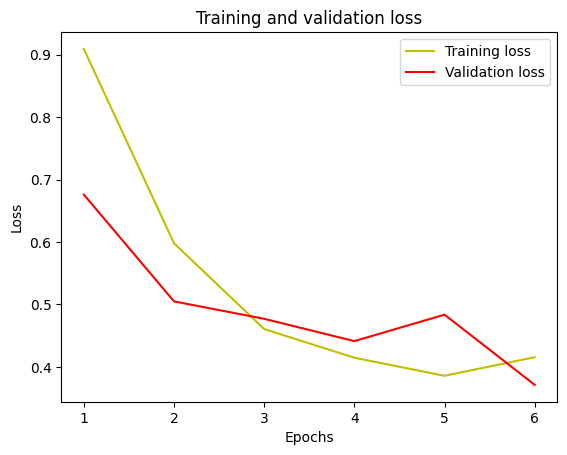

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

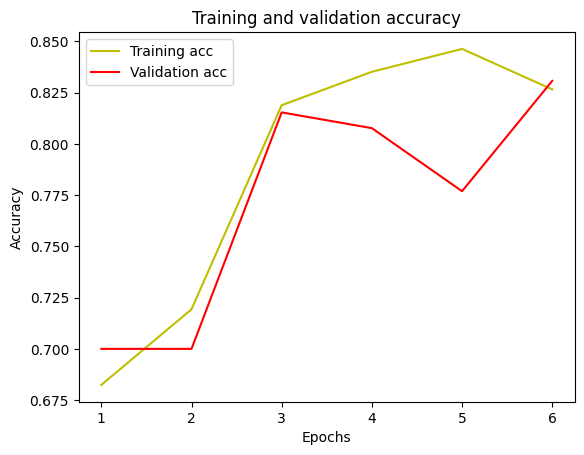

In [10]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.61      0.75      0.67        96
           1       0.00      0.00      0.00        18
           2       0.92      0.97      0.95       298
           3       0.00      0.00      0.00        20

    accuracy                           0.84       432
   macro avg       0.38      0.43      0.41       432
weighted avg       0.77      0.84      0.80       432

[[ 72   0  24   0]
 [ 18   0   0   0]
 [  8   0 290   0]
 [ 20   0   0   0]]


C:\Users\MinGi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MinGi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MinGi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo